In [1]:
import torch 
import numpy as np
import pandas as pd
from sklearn.neighbors import NearestNeighbors
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns 
import json
import numpy as np

# Symmetry

In [110]:
sym_hr_origin = torch.load('./wordnet_selected_triples/wn_symmetric_original_hr.pt').cpu().numpy()
sym_t_origin = torch.load('./wordnet_selected_triples/wn_symmetric_original_t.pt').cpu().numpy()
print(sym_hr_origin.shape,sym_t_origin.shape)

(1138, 768) (1138, 768)


In [111]:
score_arr_origin = [np.dot(sym_hr_origin[i],sym_t_origin[i]) for i in range(sym_hr_origin.shape[0])]
np.array(score_arr_origin).mean()

0.7051637

<AxesSubplot:>

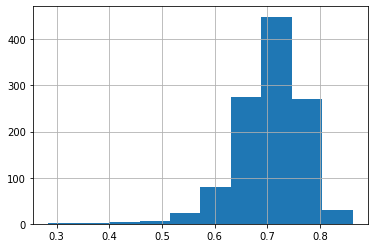

In [112]:
pd.Series(score_arr_origin).hist(bins = 10)

In [113]:
sym_hr_inversed = torch.load('./wordnet_selected_triples/wn_symmetric_inversed_hr.pt').cpu().numpy()
sym_t_inversed = torch.load('./wordnet_selected_triples/wn_symmetric_inversed_t.pt').cpu().numpy()
print(sym_hr_inversed.shape,sym_t_inversed.shape)

(1138, 768) (1138, 768)


In [114]:
score_arr_inversed = [np.dot(sym_hr_inversed[i],sym_t_inversed[i]) for i in range(sym_hr_inversed.shape[0])]
np.array(score_arr_inversed).mean()

0.7051269

<AxesSubplot:>

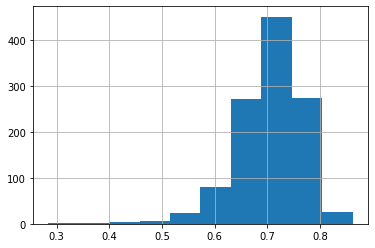

In [115]:
pd.Series(score_arr_inversed).hist(bins = 10)

In [116]:
from scipy import spatial

result = 1 - spatial.distance.cosine(score_arr_origin, score_arr_inversed)
print(result)

0.9938260912895203


In [118]:
abs(np.array(score_arr_origin) - np.array(score_arr_inversed)).mean()

0.05793981

The inversed score have a high similarity with the original.
We can infer that SimKGC can properly process symmetric relations.

# Anti-Symmetry

In [119]:
ats_hr_origin = torch.load('./wordnet_selected_triples/wn_antisymmetric_original_hr.pt').cpu().numpy()
ats_t_origin = torch.load('./wordnet_selected_triples/wn_antisymmetric_original_t.pt').cpu().numpy()
print(ats_hr_origin.shape,ats_t_origin.shape)

(4816, 768) (4816, 768)


In [120]:
score_arr_origin = [np.dot(ats_hr_origin[i],ats_t_origin[i]) for i in range(ats_hr_origin.shape[0])]
np.array(score_arr_origin).mean()

0.5539255

<AxesSubplot:>

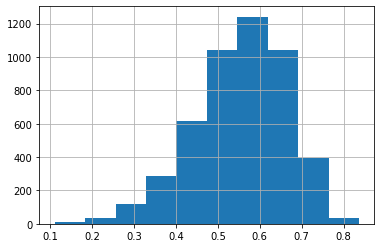

In [121]:
pd.Series(score_arr_origin).hist(bins = 10)

In [122]:
ats_hr_inversed = torch.load('./wordnet_selected_triples/wn_antisymmetric_inversed_hr.pt').cpu().numpy()
ats_t_inversed = torch.load('./wordnet_selected_triples/wn_antisymmetric_inversed_t.pt').cpu().numpy()
print(ats_hr_inversed.shape,ats_t_inversed.shape)

(4816, 768) (4816, 768)


In [123]:
score_arr_inversed = [np.dot(ats_hr_inversed[i],ats_t_inversed[i]) for i in range(ats_hr_inversed.shape[0])]
np.array(score_arr_inversed).mean()

0.36594734

In [124]:
abs(np.array(score_arr_origin) - np.array(score_arr_inversed)).mean()

0.20677634

<AxesSubplot:>

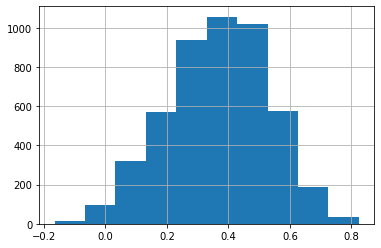

In [51]:
pd.Series(score_arr_inversed).hist(bins = 10)

In [53]:
from scipy import spatial
result = 1 - spatial.distance.cosine(score_arr_origin, score_arr_inversed)
print(result)

0.9245271682739258


From the result we can know that, when treating interchanged anti-symmetric relations, SimKGC performs slightly lower similarity in scores. But it's obvious that its ability in distinguishing anti-symmetric relations is quite limited.

# Inversion

In [125]:
inv_hr_origin = torch.load('./freebase_selected_triples/fb_inversion_original_hr.pt').cpu().numpy()
inv_t_origin = torch.load('./freebase_selected_triples/fb_inversion_original_t.pt').cpu().numpy()
print(inv_hr_origin.shape,inv_t_origin.shape)

(859, 768) (859, 768)


<AxesSubplot:>

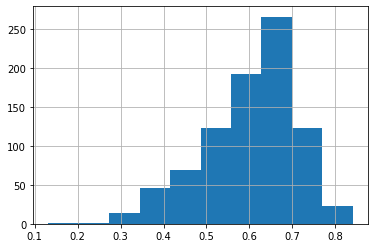

In [126]:
score_arr_origin = [np.dot(inv_hr_origin[i],inv_t_origin[i]) for i in range(inv_hr_origin.shape[0])]
pd.Series(score_arr_origin).hist(bins = 10)

In [127]:
np.array(score_arr_origin).mean()

0.6013509

In [128]:
inv_hr_inversed = torch.load('./freebase_selected_triples/fb_inversion_inversed_hr.pt').cpu().numpy()
inv_t_inversed = torch.load('./freebase_selected_triples/fb_inversion_inversed_t.pt').cpu().numpy()
print(inv_hr_inversed.shape,inv_t_inversed.shape)

(859, 768) (859, 768)


<AxesSubplot:>

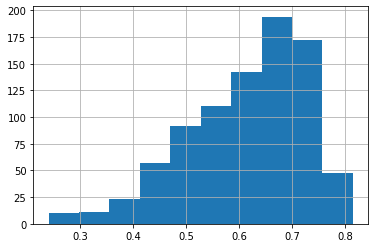

In [129]:
score_arr_inversed = [np.dot(inv_hr_inversed[i],inv_t_inversed[i]) for i in range(inv_hr_inversed.shape[0])]
pd.Series(score_arr_inversed).hist(bins = 10)

In [59]:
np.array(score_arr_inversed).mean()

0.6140954

In [130]:
abs(np.array(score_arr_origin) - np.array(score_arr_inversed)).mean()

0.06265371

In [60]:
from scipy import spatial
result = 1 - spatial.distance.cosine(score_arr_origin, score_arr_inversed)
print(result)

0.9914371967315674


For those inversed relations, we chose "film-directed, film-written-by" as a pair of inversed relations.
Those triples of h-directed-t and t-written-by-h achieves high similarity.
We can infer that SimKGC deals with inversed relations properly.

# Composition

In [131]:
com_hr_first = torch.load('./freebase_selected_triples/fb_composition_hr.pt').cpu().numpy()
com_t_first = torch.load('./freebase_selected_triples/fb_composition_t.pt').cpu().numpy()
print(com_hr_first.shape,com_t_first.shape)

(5813, 768) (5813, 768)


<AxesSubplot:>

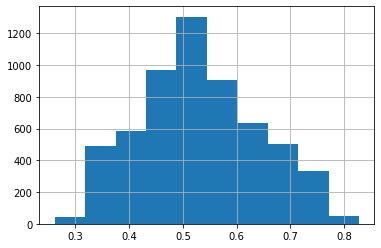

In [132]:
score_arr_first = [np.dot(com_hr_first[i],com_t_first[i]) for i in range(com_hr_first.shape[0])]
pd.Series(score_arr_first).hist(bins = 10)

In [133]:
com_hr_second = torch.load('./freebase_selected_triples/fb_composition_tail_newtail_hr.pt').cpu().numpy()
com_t_second = torch.load('./freebase_selected_triples/fb_composition_tail_newtail_t.pt').cpu().numpy()
print(com_hr_second.shape,com_t_second.shape)

(5813, 768) (5813, 768)


<AxesSubplot:>

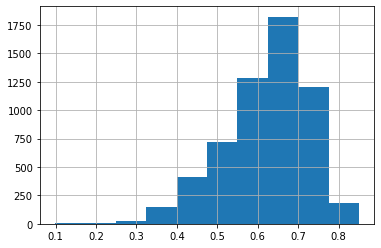

In [134]:
score_arr_second = [np.dot(com_hr_second[i],com_t_second[i]) for i in range(com_hr_second.shape[0])]
pd.Series(score_arr_second).hist(bins = 10)

In [135]:
com_hr_third = torch.load('./freebase_selected_triples/fb_composition_hr.pt').cpu().numpy()
com_t_third = torch.load('./freebase_selected_triples/fb_composition_tail_newtail_t.pt').cpu().numpy()
print(com_hr_third.shape,com_t_third.shape)

(5813, 768) (5813, 768)


<AxesSubplot:>

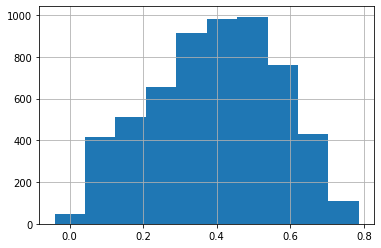

In [136]:
score_arr_third = [np.dot(com_hr_third[i],com_t_third[i]) for i in range(com_hr_third.shape[0])]
pd.Series(score_arr_third).hist(bins = 10)

In [137]:
np.array(score_arr_third).mean()

0.39420205

In [138]:
score_arr_combined = np.multiply(score_arr_first,score_arr_second)

result = 1 - spatial.distance.cosine(score_arr_combined, score_arr_third)
print(result)

0.9464030265808105


In [140]:
score_arr_diff = (np.array(score_arr_first) + np.array(score_arr_second))/2
abs(score_arr_diff - np.array(score_arr_third)).mean()

0.18623498

In [69]:
score_arr_third[:10]

[0.5526336,
 0.5298518,
 0.5332495,
 0.46623465,
 0.5403973,
 0.39872348,
 0.49819186,
 0.45996323,
 0.46521237,
 0.3745949]

In [70]:
#a -> b(1) and b -> c(2) infers a -> c(3)
#similarity between 1 and 3: 0.9397
#similarity between 2 and 3: 0.9349
#similarity between 1&2(dot product) and 3: 0.9464

Comparing to structural knowledge graph embeddings, the ability for SimKGC to infer compositional relations is weak, but it can somehow inquire knowledge from pretrained lm and descriptions.

In [98]:
Random_similarity = 0.95
def calc_scaled_similarity(sim):
    return ((sim-Random_similarity)/(1-Random_similarity))

In [99]:
print(calc_scaled_similarity(0.9938260912895203))#sym

0.8765218257904054


In [100]:
print(calc_scaled_similarity(0.9914371967315674))#inv

0.8287439346313478


In [101]:
print(calc_scaled_similarity(0.9245271682739258))#anti

-0.509456634521483


In [102]:
print(calc_scaled_similarity(0.9464030265808105))#comp

-0.0719394683837881


In [104]:
print(0.5539255-0.36594734)#anti score difference

0.18797815999999995


In [ ]:
#mean absolute score differences:
sym:0.057939
anti:0.20677634
inv:0.06265371
comp:0.18623498